## <font color = darkblue> The starter program provides code for various tree based models
    - It also includes
        - Randomized grid search
        - Variable importance information
        - Pickling the model and calling it back
    - Make sure to pip install xgboost


In [1]:
# -------------------------
# Import dependencies
# -------------------------

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler

In [2]:
# -------------------------
# Load Redfin Housing Data
# -------------------------

redfin = pd.read_csv("Redfin_CIty_Health_Me_NH_Dec3_2023.csv")

redfin


,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,...,PHLTH_Adj95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,Single Family Residential,16 Birchwood Ave,Yarmouth,ME,4096,635000,3.0,2.0,Yarmouth,1512.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
1,Single Family Residential,83 Kindred Way,Yarmouth,ME,4096,1050000,3.0,2.5,Yarmouth,3735.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
2,Single Family Residential,21 Hilltop Cir,Yarmouth,ME,4096,625000,3.0,1.0,Yarmouth,1800.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
3,Single Family Residential,276 Portland St,Yarmouth,ME,4096,399000,3.0,1.0,Yarmouth,1125.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
4,Single Family Residential,294 Portland St,Yarmouth,ME,4096,560000,3.0,2.0,Yarmouth,1120.0,...,"( 5.6, 7.0)",27.0,"(25.7, 28.3)",2.3,"( 2.0, 2.5)",1.8,"( 1.6, 2.1)",7.9,"( 4.7, 12.2)",POINT (-70.19074547 43.7984963)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Mobile/Manufactured Home,19 Rest Haven Cir,Alfred,ME,4002,104900,2.0,1.0,Alfred,1100.0,...,"( 7.7, 9.6)",33.4,"(31.9, 34.8)",3.3,"( 2.8, 3.7)",2.6,"( 2.2, 2.9)",16.3,"(10.5, 22.7)",POINT (-70.71998917 43.47674361)
2372,Mobile/Manufactured Home,32 Middle Branch Dr,Alfred,ME,4002,349900,3.0,2.0,Alfred,1152.0,...,"( 7.7, 9.6)",33.4,"(31.9, 34.8)",3.3,"( 2.8, 3.7)",2.6,"( 2.2, 2.9)",16.3,"(10.5, 22.7)",POINT (-70.71998917 43.47674361)
2373,Single Family Residential,13 East Branch Dr,Alfred,ME,4002,639900,3.0,2.5,Alfred,3504.0,...,"( 7.7, 9.6)",33.4,"(31.9, 34.8)",3.3,"( 2.8, 3.7)",2.6,"( 2.2, 2.9)",16.3,"(10.5, 22.7)",POINT (-70.71998917 43.47674361)
2374,Single Family Residential,405 Mouse Ln,Alfred,ME,4002,450000,3.0,2.0,Alfred,1188.0,...,"( 7.7, 9.6)",33.4,"(31.9, 34.8)",3.3,"( 2.8, 3.7)",2.6,"( 2.2, 2.9)",16.3,"(10.5, 22.7)",POINT (-70.71998917 43.47674361)


In [3]:
redfin.columns

Index(['PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'MLS#', 'LATITUDE', 'LONGITUDE',
       'TotalPopulation', 'ACCESS2_AdjPrev', 'ACCESS2_Adj95CI',
       'ARTHRITIS_AdjPrev', 'ARTHRITIS_Adj95CI', 'BINGE_AdjPrev',
       'BINGE_Adj95CI', 'BPHIGH_AdjPrev', 'BPHIGH_Adj95CI', 'BPMED_AdjPrev',
       'BPMED_Adj95CI', 'CANCER_AdjPrev', 'CANCER_Adj95CI', 'CASTHMA_AdjPrev',
       'CASTHMA_Adj95CI', 'CERVICAL_AdjPrev', 'CERVICAL_Adj95CI',
       'CHD_AdjPrev', 'CHD_Adj95CI', 'CHECKUP_AdjPrev', 'CHECKUP_Adj95CI',
       'CHOLSCREEN_AdjPrev', 'CHOLSCREEN_Adj95CI', 'COLON_SCREEN_AdjPrev',
       'COLON_SCREEN_Adj95CI', 'COPD_AdjPrev', 'COPD_Adj95CI', 'COREM_AdjPrev',
       'COREM_Adj95CI', 'COREW_AdjPrev', 'COREW_Adj95CI', 'CSMOKING_AdjPrev',
       'CSMOKING_Adj95CI', 'DENTAL_AdjPrev', 'DENTAL_Adj95CI',
       'DE

In [4]:
# identify features including '$/SQUARE FEET'
redfin_2 = redfin.loc[:, ['PROPERTY TYPE', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
              '$/SQUARE FEET','LATITUDE', 'LONGITUDE', 'TotalPopulation', 'ACCESS2_AdjPrev', 'ARTHRITIS_AdjPrev',
             'CANCER_AdjPrev', 'CSMOKING_AdjPrev', 'DEPRESSION_AdjPrev', 'DIABETES_AdjPrev', 'OBESITY_AdjPrev',
             'MHLTH_AdjPrev', 'PHLTH_AdjPrev']]  
                         
redfin_2
                                    

,PROPERTY TYPE,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,...,TotalPopulation,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,CANCER_AdjPrev,CSMOKING_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,OBESITY_AdjPrev,MHLTH_AdjPrev,PHLTH_AdjPrev
0,Single Family Residential,ME,4096,635000,3.0,2.0,1512.0,9583.0,1974.0,6,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
1,Single Family Residential,ME,4096,1050000,3.0,2.5,3735.0,16988.0,2017.0,11,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
2,Single Family Residential,ME,4096,625000,3.0,1.0,1800.0,14374.0,1975.0,13,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
3,Single Family Residential,ME,4096,399000,3.0,1.0,1125.0,20037.0,1975.0,13,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
4,Single Family Residential,ME,4096,560000,3.0,2.0,1120.0,12632.0,1955.0,32,...,5869,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Mobile/Manufactured Home,ME,4002,104900,2.0,1.0,1100.0,NaN,1975.0,2,...,777,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7
2372,Mobile/Manufactured Home,ME,4002,349900,3.0,2.0,1152.0,70567.0,2003.0,3,...,777,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7
2373,Single Family Residential,ME,4002,639900,3.0,2.5,3504.0,80586.0,2023.0,4,...,777,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7
2374,Single Family Residential,ME,4002,450000,3.0,2.0,1188.0,60112.0,2012.0,12,...,777,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7


In [5]:
redfin_2.columns

Index(['PROPERTY TYPE', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE',
       'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'LATITUDE', 'LONGITUDE',
       'TotalPopulation', 'ACCESS2_AdjPrev', 'ARTHRITIS_AdjPrev',
       'CANCER_AdjPrev', 'CSMOKING_AdjPrev', 'DEPRESSION_AdjPrev',
       'DIABETES_AdjPrev', 'OBESITY_AdjPrev', 'MHLTH_AdjPrev',
       'PHLTH_AdjPrev'],
      dtype='object')

In [6]:
# Recategorize the target variable into binary classes
median_price = np.median(redfin_2['PRICE'])
redfin_2['PRICE_BINARY'] = (redfin_2['PRICE'] > median_price).astype(int)  # 1 for above median, 0 for below

redfin_2

,PROPERTY TYPE,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,...,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,CANCER_AdjPrev,CSMOKING_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,OBESITY_AdjPrev,MHLTH_AdjPrev,PHLTH_AdjPrev,PRICE_BINARY
0,Single Family Residential,ME,4096,635000,3.0,2.0,1512.0,9583.0,1974.0,6,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
1,Single Family Residential,ME,4096,1050000,3.0,2.5,3735.0,16988.0,2017.0,11,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
2,Single Family Residential,ME,4096,625000,3.0,1.0,1800.0,14374.0,1975.0,13,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
3,Single Family Residential,ME,4096,399000,3.0,1.0,1125.0,20037.0,1975.0,13,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,0
4,Single Family Residential,ME,4096,560000,3.0,2.0,1120.0,12632.0,1955.0,32,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Mobile/Manufactured Home,ME,4002,104900,2.0,1.0,1100.0,NaN,1975.0,2,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,0
2372,Mobile/Manufactured Home,ME,4002,349900,3.0,2.0,1152.0,70567.0,2003.0,3,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,0
2373,Single Family Residential,ME,4002,639900,3.0,2.5,3504.0,80586.0,2023.0,4,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,1
2374,Single Family Residential,ME,4002,450000,3.0,2.0,1188.0,60112.0,2012.0,12,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,1


In [7]:
redfin_2.isnull().sum()

PROPERTY TYPE           0
STATE OR PROVINCE       0
ZIP OR POSTAL CODE      0
PRICE                   0
BEDS                   13
BATHS                  16
SQUARE FEET             6
LOT SIZE              431
YEAR BUILT             44
DAYS ON MARKET          0
$/SQUARE FEET           6
LATITUDE                0
LONGITUDE               0
TotalPopulation         0
ACCESS2_AdjPrev         0
ARTHRITIS_AdjPrev       0
CANCER_AdjPrev          0
CSMOKING_AdjPrev        0
DEPRESSION_AdjPrev      0
DIABETES_AdjPrev        0
OBESITY_AdjPrev         0
MHLTH_AdjPrev           0
PHLTH_AdjPrev           0
PRICE_BINARY            0
dtype: int64

In [8]:
# drop columns with high NAs
redfin_2 = redfin_2.drop(columns = ['LOT SIZE'])

# drop remaining NAs
redfin_2 = redfin_2.dropna()

redfin_2

,PROPERTY TYPE,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,...,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,CANCER_AdjPrev,CSMOKING_AdjPrev,DEPRESSION_AdjPrev,DIABETES_AdjPrev,OBESITY_AdjPrev,MHLTH_AdjPrev,PHLTH_AdjPrev,PRICE_BINARY
0,Single Family Residential,ME,4096,635000,3.0,2.0,1512.0,1974.0,6,420.0,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
1,Single Family Residential,ME,4096,1050000,3.0,2.5,3735.0,2017.0,11,281.0,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
2,Single Family Residential,ME,4096,625000,3.0,1.0,1800.0,1975.0,13,347.0,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
3,Single Family Residential,ME,4096,399000,3.0,1.0,1125.0,1975.0,13,355.0,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,0
4,Single Family Residential,ME,4096,560000,3.0,2.0,1120.0,1955.0,32,500.0,...,8.4,18.8,6.2,9.8,23.0,6.1,23.8,12.2,6.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Mobile/Manufactured Home,ME,4002,104900,2.0,1.0,1100.0,1975.0,2,95.0,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,0
2372,Mobile/Manufactured Home,ME,4002,349900,3.0,2.0,1152.0,2003.0,3,304.0,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,0
2373,Single Family Residential,ME,4002,639900,3.0,2.5,3504.0,2023.0,4,183.0,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,1
2374,Single Family Residential,ME,4002,450000,3.0,2.0,1188.0,2012.0,12,379.0,...,14.2,24.8,6.1,19.2,24.8,7.4,30.2,15.3,8.7,1


In [9]:
# Print only categorical columns
categorical_columns = redfin_2.select_dtypes(include='object')
print(categorical_columns)

# Perform one-hot encoding on the categorical columns
encoded_features = pd.get_dummies(redfin_2[['PROPERTY TYPE', 'STATE OR PROVINCE']])

# # Drop the original categorical columns
redfin_3 = redfin_2.drop(columns = ['PROPERTY TYPE', 'STATE OR PROVINCE'])

# # Concatenate the encoded features with the rest of the dataframe
redfin_3 = pd.concat([redfin_3, encoded_features], axis=1)
redfin_3


                  PROPERTY TYPE STATE OR PROVINCE
0     Single Family Residential                ME
1     Single Family Residential                ME
2     Single Family Residential                ME
3     Single Family Residential                ME
4     Single Family Residential                ME
...                         ...               ...
2371   Mobile/Manufactured Home                ME
2372   Mobile/Manufactured Home                ME
2373  Single Family Residential                ME
2374  Single Family Residential                ME
2375  Single Family Residential                ME

[2297 rows x 2 columns]


,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,LATITUDE,LONGITUDE,...,PROPERTY TYPE_Mobile/Manufactured Home,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Timeshare,PROPERTY TYPE_Townhouse,STATE OR PROVINCE_MA,STATE OR PROVINCE_ME,STATE OR PROVINCE_NH,STATE OR PROVINCE_VT
0,4096,635000,3.0,2.0,1512.0,1974.0,6,420.0,43.761294,-70.141766,...,0,0,0,1,0,0,0,1,0,0
1,4096,1050000,3.0,2.5,3735.0,2017.0,11,281.0,43.797566,-70.207526,...,0,0,0,1,0,0,0,1,0,0
2,4096,625000,3.0,1.0,1800.0,1975.0,13,347.0,43.802904,-70.197578,...,0,0,0,1,0,0,0,1,0,0
3,4096,399000,3.0,1.0,1125.0,1975.0,13,355.0,43.791090,-70.190203,...,0,0,0,1,0,0,0,1,0,0
4,4096,560000,3.0,2.0,1120.0,1955.0,32,500.0,43.790622,-70.190927,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,4002,104900,2.0,1.0,1100.0,1975.0,2,95.0,43.423215,-70.645396,...,1,0,0,0,0,0,0,1,0,0
2372,4002,349900,3.0,2.0,1152.0,2003.0,3,304.0,43.507335,-70.745787,...,1,0,0,0,0,0,0,1,0,0
2373,4002,639900,3.0,2.5,3504.0,2023.0,4,183.0,43.476499,-70.716169,...,0,0,0,1,0,0,0,1,0,0
2374,4002,450000,3.0,2.0,1188.0,2012.0,12,379.0,43.440317,-70.697893,...,0,0,0,1,0,0,0,1,0,0


# <font color = blue> Models for BINARY PRICE response

In [10]:
# ------------------------------------------------------
# Split the dataset into training and testing sets
# ------------------------------------------------------

# Selecting Features and Target
y = redfin_3['PRICE_BINARY'] 
X = redfin_3.drop(columns = ['PRICE_BINARY', 'PRICE'])

# # # Feature scaling
# sc = StandardScaler()
# X = sc.fit_transform(X)

# # Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color = green> Decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

# ---------------------------------------------------------------
# Train a decision tree classifier on the balanced dataset
# ---------------------------------------------------------------

clf = DecisionTreeClassifier(criterion='gini',
                             min_samples_split=5,
                             min_samples_leaf=5)
clf.fit(X_train, y_train)

# --------------------------------------------
# Evaluate the classifier on the testing set
# --------------------------------------------
y_pred_dt = clf.predict(X_test)
print(classification_report(y_test, y_pred_dt))

confusion_matrix(y_test, y_pred_dt)

# Confusion Matrix
pd.crosstab(y_pred_dt, y_test, rownames =['y_pred_dt'], colnames = ['y_test'] )


# -------------------------------------------------------
# Notes for reading the classification report
# -------------------------------------------------------

# --------------
# Precision: 
# --------------
# Measures the proportion of true positives (TP) out of all predicted positives (TP + false positives (FP)). 
# A high precision means the model makes few false positive predictions.

# --------------
# Recall: 
# --------------
# Measures the proportion of true positives (TP) out of all actual positives (TP + false negatives (FN)). \
# A high recall indicates that the model makes few false negative predictions.

# --------------
# F1-score: 
# --------------
# It is the harmonic mean of precision and recall, calculated as (2 * precision * recall) / (precision + recall). 
# It is useful especially when the classes are imbalanced 

# --------------
# Support: 
# --------------
# It is the number of observations in each class.

# --------------
# Weighted Average: 
# --------------
# It is calculated as the average of the precision, recall etc. weighted by the number of samples in each class.



              precision    recall  f1-score   support

           0       0.95      0.97      0.96       237
           1       0.97      0.95      0.96       223

    accuracy                           0.96       460
   macro avg       0.96      0.96      0.96       460
weighted avg       0.96      0.96      0.96       460



y_test,0,1
y_pred_dt,,
0,231,12
1,6,211


## <font color = green> Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ------------------
# Define the RF model
# ------------------
rf = RandomForestClassifier(n_estimators=200,
                            criterion='entropy',
                            min_samples_split=5,
                            min_samples_leaf=2,
                            max_depth = 20,
                            random_state=100)

# ------------------
# Train the models
# ------------------
rf.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_rf = rf.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf))
print('Random Forest Recall:', recall_score(y_test, y_pred_rf))
print('Random Forest F1 Score:', f1_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
pd.crosstab(y_pred_rf, y_test, rownames =['y_pred_rf'], colnames = ['y_test'] )


Random Forest Accuracy: 0.9065217391304348
Random Forest Precision: 0.9054054054054054
Random Forest Recall: 0.9013452914798207
Random Forest F1 Score: 0.9033707865168539
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       237
           1       0.91      0.90      0.90       223

    accuracy                           0.91       460
   macro avg       0.91      0.91      0.91       460
weighted avg       0.91      0.91      0.91       460



y_test,0,1
y_pred_rf,,
0,216,22
1,21,201


## <font color = darkblue> Variable Importance Information

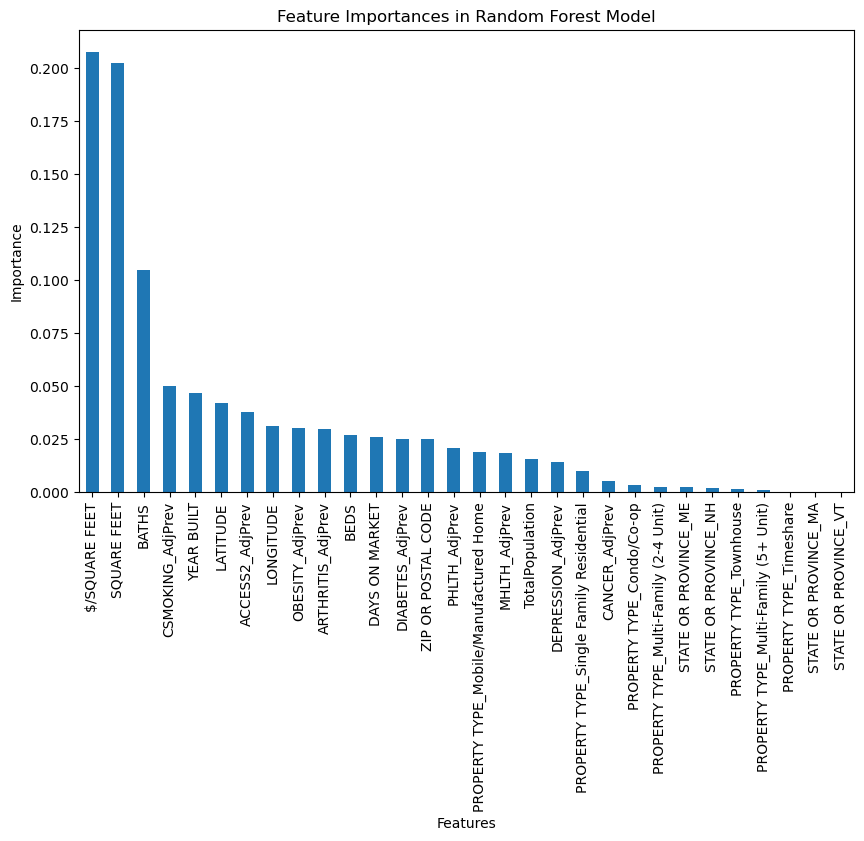

In [13]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a series with feature names and their importance
features = pd.Series(feature_importances, index = X.columns)

# # Create a series with feature names and their importance
# features = pd.Series(feature_importances, index=range(X_train.shape[1]))

# Sort the features by importance
features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')

plt.show()


## <font color = darkgreen> Gradient Boosting Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# ------------------
# Define the GB model
# ------------------
gb = GradientBoostingClassifier(n_estimators=500,
                            min_samples_split=5,
                            learning_rate=0.5,
                            min_samples_leaf=5,
                            random_state=100)

# ------------------
# Train the model
# ------------------
gb.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_gb = gb.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Gradient Boosting Precision:', precision_score(y_test, y_pred_gb))
print('Gradient Boosting Recall:', recall_score(y_test, y_pred_gb))
print('Gradient Boosting F1 Score:', f1_score(y_test, y_pred_gb))

print(classification_report(y_test, y_pred_gb))
# Confusion Matrix
pd.crosstab(y_pred_gb, y_test, rownames =['y_pred_gb'], colnames = ['y_test'] )


Gradient Boosting Accuracy: 0.9434782608695652
Gradient Boosting Precision: 0.9497716894977168
Gradient Boosting Recall: 0.9327354260089686
Gradient Boosting F1 Score: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       237
           1       0.95      0.93      0.94       223

    accuracy                           0.94       460
   macro avg       0.94      0.94      0.94       460
weighted avg       0.94      0.94      0.94       460



y_test,0,1
y_pred_gb,,
0,226,15
1,11,208


## <font color = Green> XGBoost
    - Documentation and tutorial
    https://xgboost.readthedocs.io/en/stable/tutorials/model.html

In [15]:
# help(xgb)

In [16]:
import xgboost as xgb

# ------------------
# Define the XGB model
# ------------------
xgb = xgb.XGBClassifier(n_estimators=100,
                        max_depth = 10,
                        eta= 0.01,
                        min_child_weight = 5,
                        random_state=100)

# ------------------
# Train the model
# ------------------
xgb.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_xgb = xgb.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print('XGB:', accuracy_score(y_test, y_pred_xgb))
print('XGB:', precision_score(y_test, y_pred_xgb))
print('XGB:', recall_score(y_test, y_pred_xgb))
print('XGB:', f1_score(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))
# Confusion Matrix
pd.crosstab(y_pred_xgb, y_test, rownames =['y_pred_xgb'], colnames = ['y_test'] )


XGB: 0.9434782608695652
XGB: 0.9377777777777778
XGB: 0.9461883408071748
XGB: 0.9419642857142858
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       237
           1       0.94      0.95      0.94       223

    accuracy                           0.94       460
   macro avg       0.94      0.94      0.94       460
weighted avg       0.94      0.94      0.94       460



y_test,0,1
y_pred_xgb,,
0,223,12
1,14,211


# <font color = blue> Models for CONTINUOUS PRICE response


In [17]:
# ------------------------------------------------------
# Split the dataset into training and testing sets
# ------------------------------------------------------

# Selecting Features and Target
y = redfin_3['PRICE'] 
X = redfin_3.drop(columns = ['PRICE_BINARY', 'PRICE'])

# # # Feature scaling
# sc = StandardScaler()
# X = sc.fit_transform(X)

# # Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color = green> Decision tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------------------------------------------
# Train a decision tree regressor on the balanced dataset
# ---------------------------------------------------------------
reg = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=5)
reg.fit(X_train, y_train)

# --------------------------------------------
# Evaluate the regressor on the testing set
# --------------------------------------------
y_pred_dt = reg.predict(X_test)

# Evaluate R-squared (R2)
r_squared = r2_score(y_test, y_pred_dt)
print("Decision Tree R-squared:", r_squared)

# Evaluate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
print("Decision Tree Root Mean Squared Error:", rmse)

Decision Tree R-squared: 0.9288079160885627
Decision Tree Root Mean Squared Error: 80944.20785408333


## <font color = green> Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------
# Define the RF model for regression
# ------------------
rf_reg = RandomForestRegressor(n_estimators=200,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               max_depth = 20,
                               random_state=100)

# ------------------
# Train the model for regression
# ------------------
rf_reg.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_rf_reg = rf_reg.predict(X_test)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_rf = r2_score(y_test, y_pred_rf_reg)
print('Random Forest R-squared (R2):', r2_rf)

rmse_rf = mean_squared_error(y_test, y_pred_rf_reg, squared=False)
print('Random Forest Root Mean Squared Error (RMSE):', rmse_rf)


Random Forest R-squared (R2): 0.9683236004964868
Random Forest Root Mean Squared Error (RMSE): 53993.04619137826


## <font color = darkblue> Randomized Grid Search
    - The code creates a grid of hyperparameters and then runs a randomized cross validation
    - Note the n_iteration parameter in RandomizedSearchCV, which randomly picks n_iter combinations of hyperparameters and runs through them

In [20]:
import pickle
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint

# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=100)

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=5, scoring='r2', random_state=100, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training Random Forest...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
print("Hyperparameters of the Best Model:", best_rf_model.get_params())
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-2 Score:", r2)


# Save all R-2 values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll R-2 values and parameter combinations:")
print(cv_results_df)




Training Random Forest...

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}
Hyperparameters of the Best Model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 30, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R-2 Score: 0.9665289131215353

All R-2 values and parameter combinations:
                                              params  mean_test_score  \
0  {'n_estimators': 100, 'min_samples_split': 10,...         0.951151   
1  {'n_estimators': 50, 'min_samples_split': 10, ...         0.949424   
2  {'n_estimators': 50, 'min_samples_split': 5, '...         0.950433   
3  {'n_estimators': 200, 'min_samples_split': 10,...         0.950400   
4  {'n_estimators': 200

## <font color = darkblue> Pickling the model and calling it back

In [21]:
# --------------------
# Save the best model
# --------------------
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)
print("Best Random Forest model saved as 'best_rf_model.pkl'")

# --------------------
# Load the model from disk
# --------------------
with open('best_rf_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

prediction = loaded_rf_model.predict(X_test.iloc[0:])
print("\nPrediction for a new sample:", prediction)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_rf = r2_score(y_test, y_pred_rf_reg)
print('Random Forest R-squared (R2):', r2_rf)

rmse_rf = mean_squared_error(y_test, y_pred_rf_reg, squared=False)
print('Random Forest Root Mean Squared Error (RMSE):', rmse_rf)

Best Random Forest model saved as 'best_rf_model.pkl'

Prediction for a new sample: [ 886984.19285714  815874.01654762  762258.53030303  318189.95833333
   96710.17135714  869689.53888889  210652.35941558  818164.06666667
  549461.67857143  388083.88095238  398735.50793651  265161.68809524
  756151.70995671  235465.7947619   396858.26178571  525867.49518254
  328606.3047619   650715.56011905  272291.00698413  704447.75764286
  123559.01687302  235008.44        324638.08782684  210779.01916667
  269782.89304365  727260.11840476  646247.2943254   628750.37433333
  370853.66489286  498834.38371429  139453.85666667  403816.92002381
    8419.86607143  386584.26264286 1072588.32698413  362962.24133333
  747628.13593074  627768.34498413  837613.6097619   493461.74452381
  278005.21904762  108265.95190476  332529.07456349  130557.13214286
  118042.38730159  305965.17619048 1003024.203       539137.78333333
  253038.48436508  499713.75619048   77190.59007143  189328.39035714
  846534.11507937  

## <font color = darkblue> Variable Importance Information

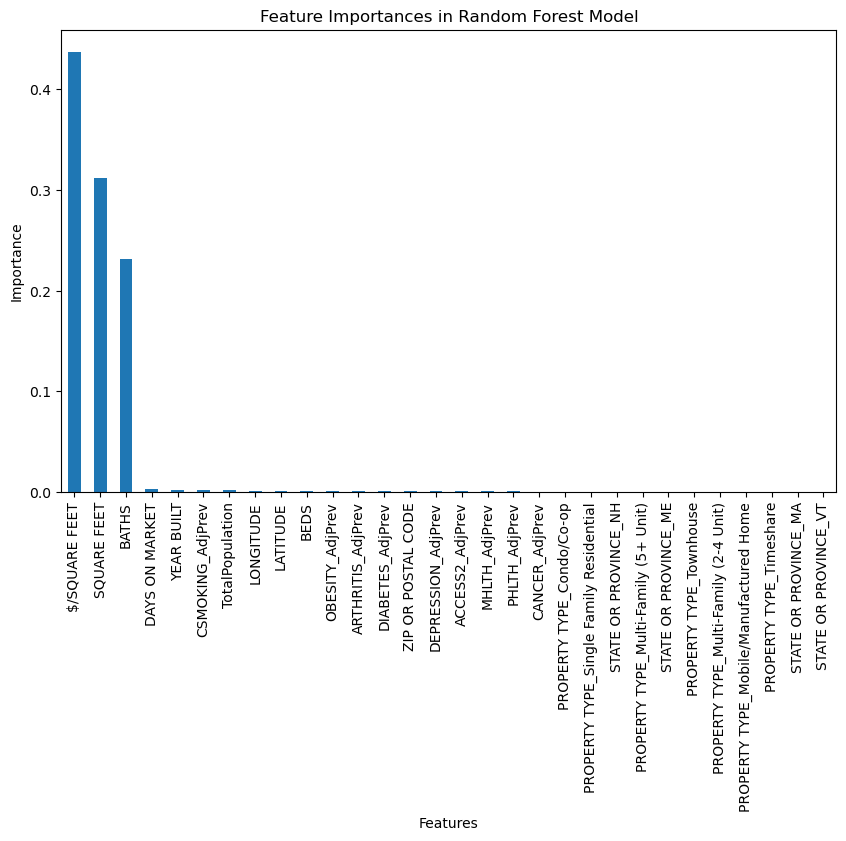

In [22]:
# Extract feature importances
feature_importances = rf_reg.feature_importances_

# Create a series with feature names and their importance
features = pd.Series(feature_importances, index = X.columns)

# Sort the features by importance
features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')

plt.show()

## <font color = darkgreen> Gradient Boosting Regression
 

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------
# Define the GB model for regression
# ------------------
gb_reg = GradientBoostingRegressor(n_estimators=500,
                                   min_samples_split=5,
                                   learning_rate=0.5,
                                   min_samples_leaf=5,
                                   random_state=100)

# ------------------
# Train the model for regression
# ------------------
gb_reg.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_gb_reg = gb_reg.predict(X_test)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_gb = r2_score(y_test, y_pred_gb_reg)
print('Gradient Boosting R-squared (R2):', r2_gb)

rmse_gb = mean_squared_error(y_test, y_pred_gb_reg, squared=False)
print('Gradient Boosting Root Mean Squared Error (RMSE):', rmse_gb)

Gradient Boosting R-squared (R2): 0.96966096429363
Gradient Boosting Root Mean Squared Error (RMSE): 52840.97360756756


## <font color = darkgreen> XGBoost

In [24]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# ------------------
# Define the XGB model for regression
# ------------------
xgb_reg = xgb.XGBRegressor(n_estimators=100,
                           max_depth=10,
                           learning_rate=0.01,
                           min_child_weight=5,
                           random_state=100)

# ------------------
# Train the model for regression
# ------------------
xgb_reg.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_xgb_reg = xgb_reg.predict(X_test)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_xgb = r2_score(y_test, y_pred_xgb_reg)
print('XGBoost R-squared (R2):', r2_xgb)

rmse_xgb = mean_squared_error(y_test, y_pred_xgb_reg, squared=False)
print('XGBoost Root Mean Squared Error (RMSE):', rmse_xgb)

XGBoost R-squared (R2): 0.786440111157604
XGBoost Root Mean Squared Error (RMSE): 140194.10987012766


In [25]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=100)

# ---------------------------------
# Define the hyperparameter grid
# ---------------------------------
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_dist, n_iter=10, cv=5, scoring='r2', random_state=100, n_jobs=-1, return_train_score=True)

# Perform hyperparameter tuning
print("Training XGBoost...")
random_search.fit(X_train, y_train)

# Display the best parameters
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)

# Train the XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(random_state=42, **best_params)
print("Hyperparameters of the Best Model:", best_xgb_model.get_params())
best_xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-2 Score:", r2)

# Save all R-2 values and parameter combinations
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df = cv_results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print("\nAll R-2 values and parameter combinations:")
print(cv_results_df)


Training XGBoost...

Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Hyperparameters of the Best Model: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weigh

In [26]:
# --------------------
# Save the best model
# --------------------
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)
print("Best XGBoost model saved as 'best_xgb_model.pkl'")

# --------------------
# Load the model from disk
# --------------------
with open('best_xgb_model.pkl', 'rb') as f:
    loaded_xgb_model = pickle.load(f)

prediction = loaded_xgb_model.predict(X_test.iloc[0:])
print("\nPrediction for a new sample:", prediction)

# ------------------------------------------------
# Evaluate the model using R-squared (R2) and RMSE
# ------------------------------------------------
r2_xgb = r2_score(y_test, prediction)
print('XGBoost R-squared (R2):', r2_xgb)

rmse_xgb = mean_squared_error(y_test, prediction, squared=False)
print('XGBoost Root Mean Squared Error (RMSE):', rmse_xgb)

Best XGBoost model saved as 'best_xgb_model.pkl'

Prediction for a new sample: [ 923889.4    806335.4    778477.4    300760.72    82375.82   880213.9
  214886.12   822176.4    553269.7    395083.66   395552.44   264892.28
  692113.06   239672.53   394653.1    536544.9    362579.2    625342.25
  270807.8    724158.25   112359.875  233697.02   310909.12   161461.45
  269102.4    761153.5    632921.4    653065.6    370226.84   527587.
  136543.     388575.44   -33678.258  366917.4   1191586.5    328681.66
  752796.4    636104.25   788312.1    487579.78   288310.4    117601.98
  327562.3    135690.28   109530.305  314286.5   1067345.9    528419.6
  273203.62   485724.22    43633.645  187874.48   811795.8    383336.44
  290255.7    857209.1    451077.7     15044.52   420554.1    170991.12
  527259.56   286451.56   225603.25   188707.11   458965.16   332338.34
  516369.8    133999.6    430211.62   565927.75   316989.1    695360.4
  370226.84   273612.75   243178.08   735569.6    755081.1    